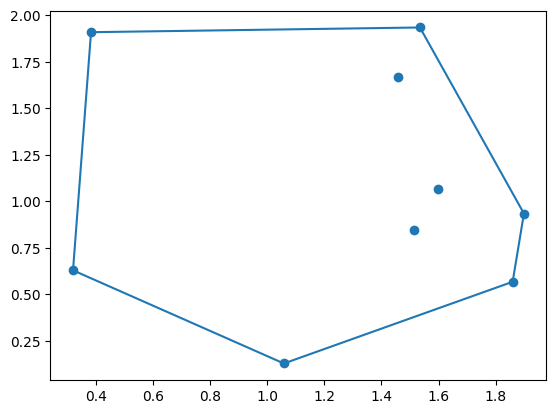

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data = np.loadtxt('mesh.dat', skiprows=1)
data = data[(data[:, 0] < 2) & (data[:, 1] < 2)]
X = data[:, 0]
Y = data[:, 1]

#2D Graham scan 

def isCCW(v_a, v_b):
    crossprod = v_a[0]*v_b[1] - v_a[1]*v_b[0]
    return(crossprod>0)

def Grahamscan(data):
    Y = data[:, 1]
    ii = np.argmin(Y)        #find lowest y coordinate
    ipt = data[ii]
    length = len(data)
    angarr = np.zeros(length)
    for j in range(length):       #i'll take the dot product to represent an angle. a is the unit vector in x direction, b is displacement ot new pt
        a = [1,0]
        b = data[j]-ipt
        normb = np.sqrt(b[0]**2 + b[1]**2)
        if(j==ii):
            angarr[j] = -999
        else:
            angarr[j] = np.dot(a,b) / normb
    sort_indices = np.argsort(angarr)
    data_sorted = data[sort_indices]
    
    hull = []                           #data_sorted[0:3, :]   didn't do this since you can only append to lists
    for k in range(3):
        hull.append(data_sorted[k])    #adds first three points
        
    for i in range(3, length):
        cont=True
        while(cont):
            v_next = data_sorted[i]-hull[-1]
            v_prev = hull[-1]-hull[-2]
            if(isCCW(v_prev,v_next)):
                hull.pop()
                cont = True
            else:
                cont = False
                hull.append(data_sorted[i])
                
    
    hull.append(data_sorted[0]) #handles last step
    return hull
    

hull = np.array(Grahamscan(data))  #plots
X_f = hull[:, 0]
Y_f = hull[:, 1]
plt.plot(X_f, Y_f)
plt.scatter(X,Y) 

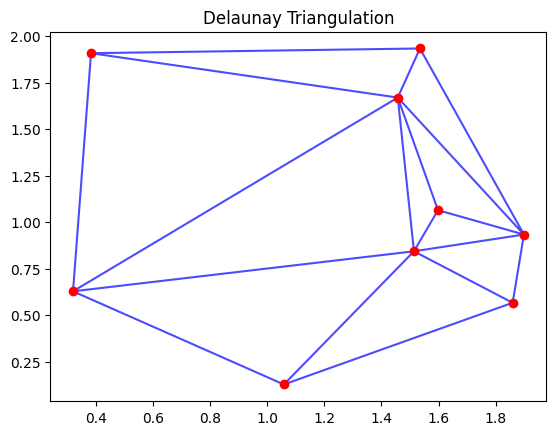

In [2]:
# Compute Delaunay triangulation

from scipy.spatial import Delaunay

points = np.column_stack((X, Y))
    

tri = Delaunay(points)

# Plot the points and the triangulation
plt.triplot(X, Y, tri.simplices, color='blue', alpha=0.7)
plt.scatter(X, Y, color='red', label='Points')
plt.title('Delaunay Triangulation')
plt.show()

In [3]:
#now lift the surface, and for each triangle calculate the change in area

def triangle_area(p1, p2, p3): #input is numpy arrays p = [x, y, z]
    
    # Calculate the vectors for two sides of the triangle, and their cross product
    v1 = p2 - p1
    v2 = p3 - p1
    cross_product = np.cross(v1, v2)
    
    area = 0.5 * np.linalg.norm(cross_product)    #area is half the parallelogram they form
    return area

def plot_filled_triangle(p1, p2, p3, color):
    
    # Plot and fill the triangle
    plt.fill(x_coords, y_coords, color=color, edgecolor='black', alpha=0.7)
    
    # Set labels and grid
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Triangle on 2D Heat Map')
    plt.grid(True)
    plt.show()

def lift_f(x, y):
    return x**2 + y**2





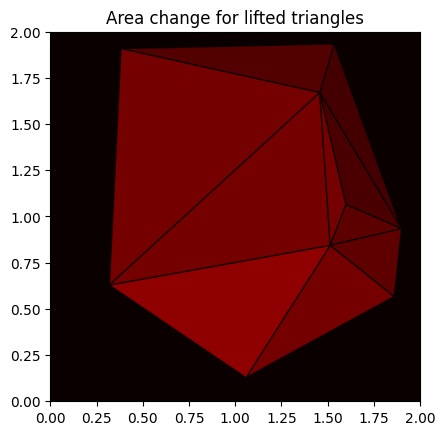

In [4]:
tricoords = tri.simplices
#print(tricoords)

# Plot heat map background
plt.imshow(np.zeros((2, 2)), cmap='hot', origin='lower', extent=(0, 2, 0, 2))

for t in tricoords:
    p1 = points[t[0]]
    p2 = points[t[1]]
    p3 = points[t[2]]
    #print("Points: ", p1, p2, p3)
    og_area = triangle_area(p1,p2,p3)
    #print("Area: ", og_area)

    z1 = lift_f(p1[0], p1[1])       
    lifted_p1 = np.append(p1, z1)
    z2 = lift_f(p2[0], p2[1])      
    lifted_p2 = np.append(p2, z2)
    z3 = lift_f(p3[0], p3[1])       
    lifted_p3 = np.append(p3, z3)

    #print("Lifted Points: ", lifted_p1, lifted_p2, lifted_p3)
    new_area = triangle_area(lifted_p1, lifted_p2, lifted_p3)
    #print("Lifted Area: ", new_area)

    redness = (og_area/new_area)

    x_coords = [p1[0], p2[0], p3[0]]  # Extract x and y coordinates of the points
    y_coords = [p1[1], p2[1], p3[1]]
    plt.fill(x_coords, y_coords, color=(2*redness, 0, 0), edgecolor='black', alpha=0.7)    # Plot and fill the triangle, using an RGB tuple
    plt.title('Area change for lifted triangles')
    
#plt.grid(True)
plt.show()

#makes sense that triangles are stretched depending on how far they are from origin

c) 

The induced metric can be calculated by taking derivatives (d/dx and d/dy) of $\vec{r} = (x, y, x^2 + y^2)$, and performing dot products.

$g_{xx} = 1+4x^2$

$g_{xy} = g_{yx} = 4xy$

$g_{yy} = 1+4y^2$


[[4 6 2]
 [6 0 2]
 [1 6 4]
 [6 1 7]
 [3 8 5]
 [5 8 7]
 [0 8 2]
 [8 3 2]
 [8 6 7]
 [6 8 0]]


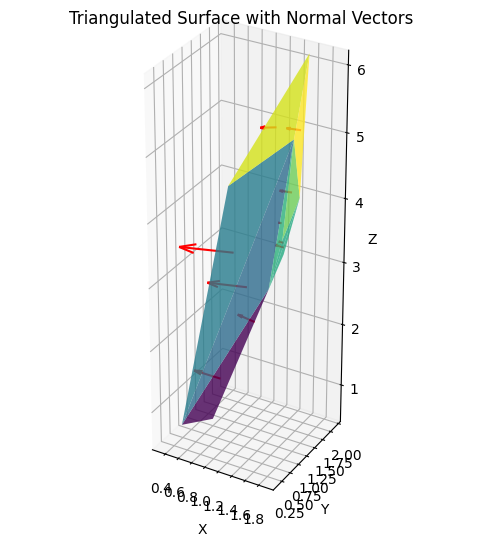

In [9]:
#now plot the lifted surface in 3D, along with a surface normal

zvals = []
for pt in points:
    zvals.append(lift_f(pt[0], pt[1]))

lifted_points = np.column_stack((X, Y, np.array(zvals)))


tri_3D = Delaunay(lifted_points[:, :2])  # Use only the x, y coordinates for triangulation
print(tri_3D.simplices)


# Plot the triangulated surface in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Use plot_trisurf to create the surface
ax.plot_trisurf(lifted_points[:, 0], lifted_points[:, 1], lifted_points[:, 2], triangles=tri_3D.simplices, cmap='viridis', alpha=0.8)


def triangle_normal(p1, p2, p3): #input is numpy arrays p = [x, y, z]
    
    # Calculate the vectors for two sides of the triangle, and their cross product
    v1 = p2 - p1
    v2 = p3 - p1
    cross_product = np.cross(v1, v2)
    return cross_product

for t in tri_3D.simplices:
    p1 = lifted_points[t[0]]
    p2 = lifted_points[t[1]]
    p3 = lifted_points[t[2]]
    #print("Pt: ", p1, p2, p3)
    normal = triangle_normal(p1, p2, p3)  
    if(normal[2]<0):
        normal = normal*-1    #flip if facing downwards
    center = (p1 + p2 + p3) / 3     # Calculate the center of the triangle
    
    # Plot the normal vector
    ax.quiver(
        center[0], center[1], center[2],  # Origin of the vector
        normal[0]/5, normal[1]/5, normal[2]/5,  # Direction of the vector, 5 is an arbitrary factor for aesthetics
        color='red'
    )


ax.set_box_aspect([1, 1, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangulated Surface with Normal Vectors')
plt.show()

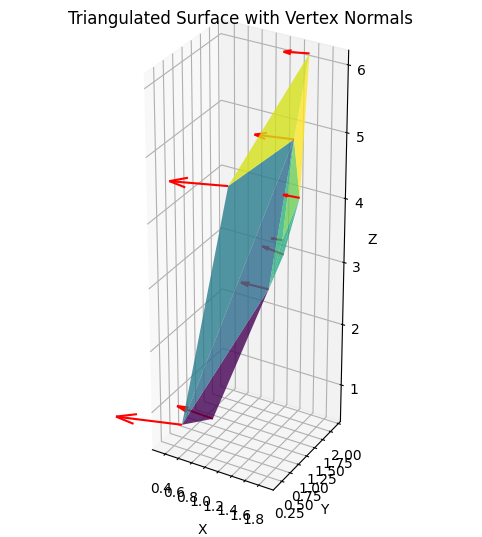

In [11]:
# e) 
# Plot the vertex normals, averages of the face normals


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Use plot_trisurf to create the surface
ax.plot_trisurf(lifted_points[:, 0], lifted_points[:, 1], lifted_points[:, 2], triangles=tri_3D.simplices, cmap='viridis', alpha=0.8)

vertex_norms = np.zeros(lifted_points.shape)  #creating a copy to store the averaged values
num_vertexes = np.zeros(len(lifted_points))

for t in tri_3D.simplices:
    p1 = lifted_points[t[0]]
    p2 = lifted_points[t[1]]
    p3 = lifted_points[t[2]]
    normal = triangle_normal(p1, p2, p3) 
    if(normal[2]<0):
        normal = normal*-1    #flip if facing downwards

    vertex_norms[t[0]] += normal
    num_vertexes[t[0]] +=1
    vertex_norms[t[1]] += normal
    num_vertexes[t[1]] +=1
    vertex_norms[t[2]] += normal
    num_vertexes[t[2]] +=1

    
for i in range(len(vertex_norms)):
    v = vertex_norms[i] / num_vertexes[i]
    pt = lifted_points[i]
    # Plot the normal vector
    ax.quiver(
        pt[0], pt[1], pt[2],  # Origin of the vector
        v[0]/3, v[1]/3, v[2]/3,  # Direction of the vector, 3 arbitrary scale factor
        color='red'
    )


ax.set_box_aspect([1, 1, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangulated Surface with Vertex Normals')
plt.show()

In [ ]:
#f)
#Compute the second fundamental form

$II = 
\begin{bmatrix} 
L & M \\ 
M & N 
\end{bmatrix}
 $

where $ L = \vec{r_xx} \cdot \vec{N}, M = \vec{r_xy} \cdot \vec{N}, N = \vec{r_yy} \cdot \vec{N}$

Given that $ \vec{r} = (x, y, x^2 + y^2) $

II =$II =
\begin{bmatrix} 
2N_z & 0 \\ 
0 & 2N_z 
\end{bmatrix} $

That makes sense, the curvature in the space is symmetric in x and y, so it should only depend on z. N_z is z component of the normal vector.

In [13]:
print("Second Fundamental Forms:")
IImat = np.array([[2,0], [0,2]])

for i in range(len(vertex_norms)):
    II = IImat * vertex_norms[i][2]
    print(II)

Second Fundamental Forms:
[[0.64715776 0.        ]
 [0.         0.64715776]]
[[3.38595638 0.        ]
 [0.         3.38595638]]
[[1.10618168 0.        ]
 [0.         1.10618168]]
[[1.02323995 0.        ]
 [0.         1.02323995]]
[[0.95181273 0.        ]
 [0.         0.95181273]]
[[2.26194576 0.        ]
 [0.         2.26194576]]
[[6.22438879 0.        ]
 [0.         6.22438879]]
[[6.29502387 0.        ]
 [0.         6.29502387]]
[[4.85599599 0.        ]
 [0.         4.85599599]]


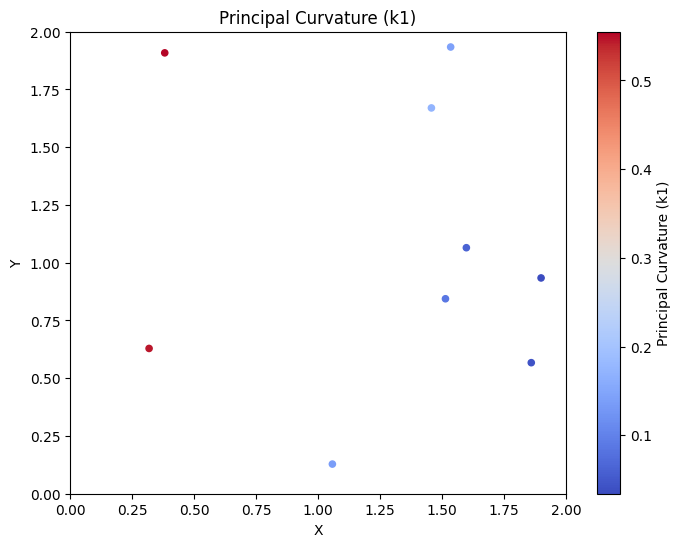

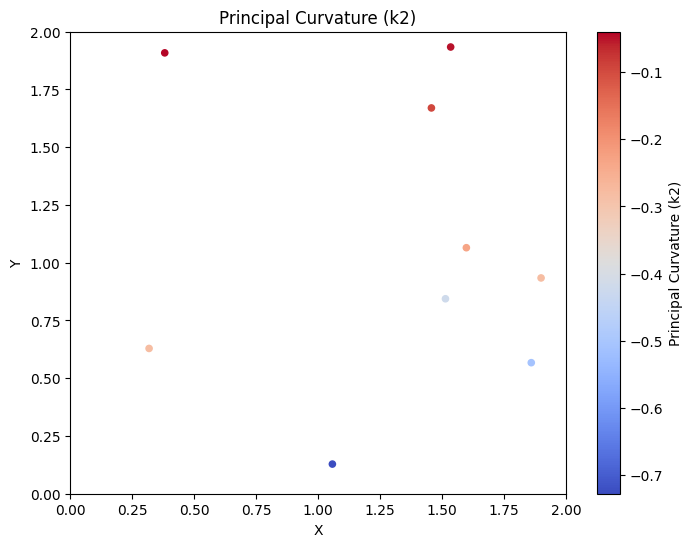

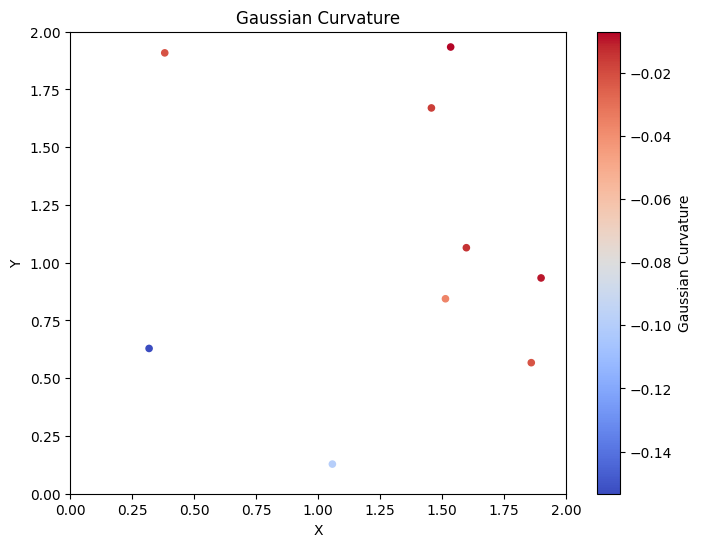

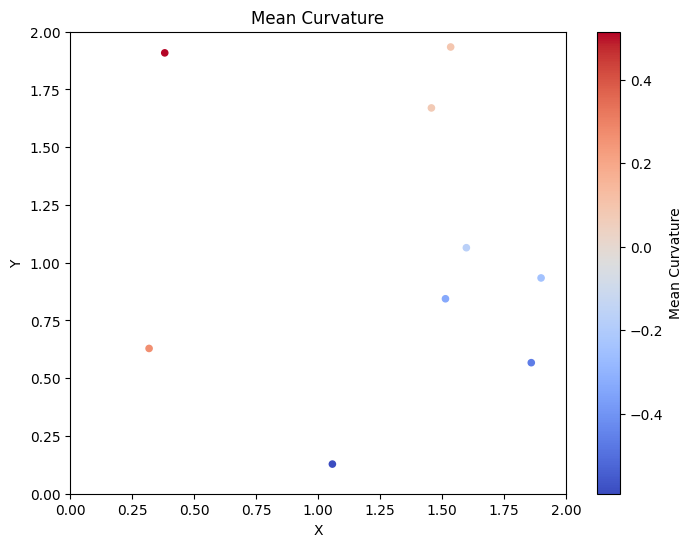

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def compute_curvatures(x, y, N):
    """
    Computes the principal curvatures, Gaussian curvature, and mean curvature 
    for the surface z = x^2 + y^2 with the normal vector N.

    Returns:
        eigenvalues: Principal curvatures
        det_S: Gaussian curvature
        trace_S: Mean curvature
    """

    N = N / np.linalg.norm(N, axis=1, keepdims=True)

    # First fundamental form coefficients
    E = 1 + 4 * x**2
    F = 4 * x * y
    G = 1 + 4 * y**2

    # Second fundamental form coefficients
    L = 2 * N[:, 2]  # Use element-wise operations
    M = 0 * N[:, 2]
    N_coeff = 2 * N[:, 2]  # Avoid overwriting the variable N

    # Compute the shape operator S = II * (I^-1)
    denom = E * G - F**2  # Determinant of the first fundamental form
    S11 = (L * G - M * F) / denom
    S12 = (M * G - N_coeff * F) / denom
    S21 = (L * F - M * E) / denom
    S22 = (M * F - N_coeff * E) / denom

    # Compute eigenvalues (principal curvatures)
    S_matrix = np.array([[S11, S12], [S21, S22]]).T  # Transpose for correct shape
    eigenvalues = np.linalg.eigvals(S_matrix)  # Compute eigenvalues for each point

    # Gaussian and mean curvature
    det_S = S11 * S22 - S12 * S21  # Gaussian curvature
    trace_S = S11 + S22  # Mean curvature

    return eigenvalues, det_S, trace_S

def visualize_curvature(x, y, curvature, title, cmap='coolwarm'):
    """
    Visualizes curvature on a 2D plot.

    Parameters:
        x, y: 1D arrays of coordinates.
        curvature: 1D array of curvature values.
        title: String for plot title.
        cmap: Colormap.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Scatter plot since data is unstructured
    sc = ax.scatter(x, y, c=curvature, cmap=cmap, s=20)
    plt.colorbar(sc, label=title)
    
    ax.set_xlabel('X')
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.set_ylabel('Y')
    ax.set_title(title)
    plt.show()

# Extract x and y coordinates correctly
x_temp = lifted_points[:, 0]  # Corrected indexing
y_temp = lifted_points[:, 1]

# Compute curvatures for all points
pC, gC, mC = compute_curvatures(x_temp, y_temp, vertex_norms)

# Visualize results correctly
visualize_curvature(x_temp, y_temp, pC[:, 0], "Principal Curvature (k1)", cmap='coolwarm')
visualize_curvature(x_temp, y_temp, pC[:, 1], "Principal Curvature (k2)", cmap='coolwarm')
visualize_curvature(x_temp, y_temp, gC, "Gaussian Curvature", cmap='coolwarm')
visualize_curvature(x_temp, y_temp, mC, "Mean Curvature", cmap='coolwarm')


I assume that it doens't look perfectly radially symmetric because my mesh size is pretty large. Calculating the vertex normals isn't a totally local process.